Unable to revert mtime: /Library/Fonts
Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


m
[0.56196491]
merr
[0.00268558]


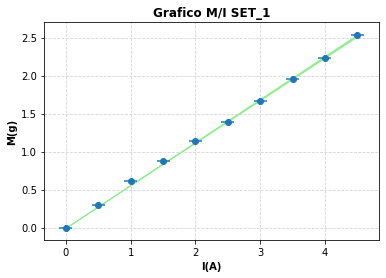

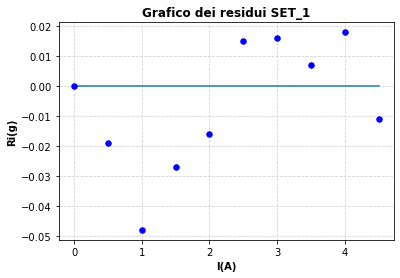

sigma_post_fit
0.022668902538504034
m
[0.57031579]
merr
[0.00403066]


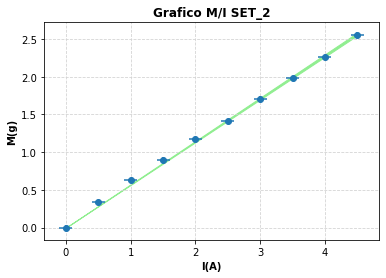

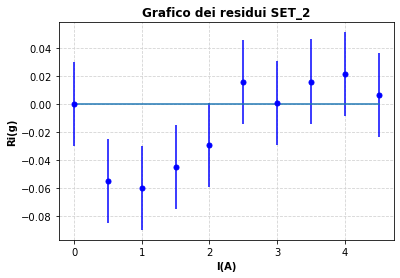

sigma_post_fit
0.03402269624308343


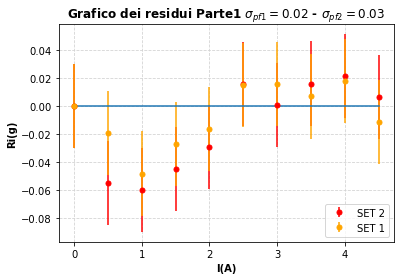

sigma_post_fit
0.03402269624308343


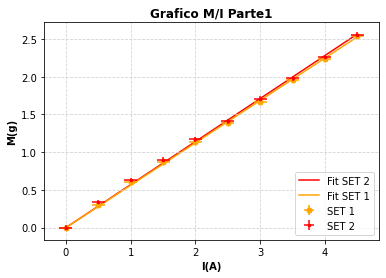

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

fig = plt.figure()
ax = fig.gca()

#gli errori sulle masse considerati sono 0.014*2
#la sigma post fit nelle due simulazioni risulta di poco minore
#quindi è una buona stima dell'errore, forse, un po sovrastimato

F1 = F = np.array([0,0.300,0.610,0.870,1.140,1.390,1.670,1.960,2.230,2.540])
F_err = np.ones(10)*0.03

I1 = I = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
I_err = np.ones(10)*0.1

plt.title("Grafico M/I SET_1",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(I, F, xerr=I_err, yerr=F_err, fmt='o')

def func(x, A):
  return (A*x)

popt, pcov = scipy.optimize.curve_fit(func, I, F,sigma=F_err)

#fit,cov = np.polyfit(I,F, 1,w = 1/F_err,cov="True")
#merr,qerr = np.sqrt(np.diag(cov))
merr = np.sqrt(np.diag(pcov))
#m,q = fit
m = popt
deltaYtot = (F_err**2+(m*I_err)**2)**(1/2)
#fit,cov = np.polyfit(I,F, 1,w = 1/deltaYtot,cov="True")
popt, pcov = scipy.optimize.curve_fit(func, I, F,sigma=deltaYtot)
#merr,qerr = np.sqrt(np.diag(cov))
merr = np.sqrt(np.diag(pcov))
#m,q = fit
m = popt

print("m")
print(m)
print("merr")
print(merr)
#print("q")
#print(q)
#print("qerr")
#print(qerr)
q = qerr = 0

x1 = x = np.linspace(0,4.5,1000)

y1 = y = q + m*x 

y1_erroreMin = y_erroreMin = (q-qerr) + (m-merr)*x

y1_erroreMax = y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)
plt.show()
#fig.savefig(f'Fit_Parte1_SET1.pdf',dpi = 300)


Ff = q+m*I

Ri = Ff-F

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui SET_1",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("Ri(g)",fontweight="bold")
plt.plot(np.linspace(0,4.5,1000),np.zeros(1000))
plt.scatter(I,Ri, s=30, color='blue',zorder=3)
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Residui_Parte1_SET1.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ff-F)**2)/(len(Ff)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)



fig = plt.figure()
ax = fig.gca()

F = np.array([0,0.340,0.630,0.900,1.170,1.410,1.710,1.980,2.260,2.560])
F_err = np.ones(10)*0.03
I = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
I_err = np.ones(10)*0.1

plt.title("Grafico M/I SET_2",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(I, F, xerr=I_err, yerr=F_err, fmt='o')

def func(x, A):
  return (A*x)

popt, pcov = scipy.optimize.curve_fit(func, I, F,sigma=F_err)

#fit,cov = np.polyfit(I,F, 1,w = 1/F_err,cov="True")
#merr,qerr = np.sqrt(np.diag(cov))
merr = np.sqrt(np.diag(pcov))
#m,q = fit
m = popt
deltaYtot = (F_err**2+(m*I_err)**2)**(1/2)
#fit,cov = np.polyfit(I,F, 1,w = 1/deltaYtot,cov="True")
popt, pcov = scipy.optimize.curve_fit(func, I, F,sigma=deltaYtot)
#merr,qerr = np.sqrt(np.diag(cov))
merr = np.sqrt(np.diag(pcov))
#m,q = fit
m = popt

print("m")
print(m)
print("merr")
print(merr)
#print("q")
#print(q)
#print("qerr")
#print(qerr)
q = qerr = 0


x = np.linspace(0,4.5,1000)

y = q + m*x 

y_erroreMin = (q-qerr) + (m-merr)*x

y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Fit_Parte1_SET2.pdf',dpi = 300)

Ff = q+m*I

Ri2 = Ff-F

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui SET_2",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("Ri(g)",fontweight="bold")
plt.plot(np.linspace(0,4.5,1000),np.zeros(1000))
plt.errorbar(I, Ri2, markersize = 5, color="blue", yerr=F_err, fmt='o')
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Residui_Parte1_SET2.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ff-F)**2)/(len(Ff)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

#residui tot

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Parte1 $\sigma_{pf1} = 0.02$ - $\sigma_{pf2} = 0.03$",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("Ri(g)",fontweight="bold")
plt.plot(np.linspace(0,4.5,1000),np.zeros(1000))
plt.errorbar(I, Ri2, markersize = 5, yerr=F_err, fmt='o', color="red", label="SET 2")
plt.errorbar(I1, Ri, markersize = 5, yerr=F_err, fmt='o', color="orange", label="SET 1")
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.legend(loc="lower right")
plt.show()
#fig.savefig(f'Residui_Parte1.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ff-F)**2)/(len(Ff)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

#grafico tot
fig = plt.figure()
ax = fig.gca()
plt.title("Grafico M/I Parte1",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(I1, F1, xerr=I_err, yerr=F_err, fmt='o', markersize = 5, zorder=5, color = "orange", label = "SET 1")
plt.errorbar(I, F, xerr=I_err, yerr=F_err, fmt='o', markersize = 2.5, zorder=6, color = "red", label = "SET 2")


plt.plot(x,y, color="red",zorder=1, label = "Fit SET 2")
plt.plot(x1,y1, color="orange",zorder=1, label = "Fit SET 1")
plt.legend(loc="lower right")
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'GraficoMIParte1.pdf',dpi = 300)